# Projekt

### Konfiguracja

In [1]:
from plot_tool import *
from create_visibility_graph import create_visibility_graph
from shortest_path import shortest_path
from Point import Point
from Figure import Figure
from plotter.Plotter import Plotter

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 0.4
mpl.rcParams['grid.linewidth'] = 0.4

### Funkcje pomocnicze do tworzenia rysunków

In [2]:
def visibility_graph_scenes(figures):
    vg = create_visibility_graph(figures)

    figures_lines_collections = [LinesCollection([[(figure.points[i - 1].x, figure.points[i - 1].y), (figure.points[i].x, figure.points[i].y)]
                                                  for i in range(len(figure.points))], color="tab:red", linestyle="dotted", zorder=2, linewidth=2.5) for figure in figures]

    points_collection = PointsCollection(vg.get_points(), color="tab:green", zorder=3, marker=".")
    lines_collection = LinesCollection(vg.get_lines(), color="tab:blue", zorder=1, linewidth=0.8)

    return [ Scene([points_collection], [lines_collection]) , Scene([points_collection], figures_lines_collections + [lines_collection]) ]


def visibility_graph_scenes_separately(figures):
    vg = create_visibility_graph(figures)

    figures_lines_collections = [LinesCollection([[(figure.points[i - 1].x, figure.points[i - 1].y), (figure.points[i].x, figure.points[i].y)]
                                                  for i in range(len(figure.points))], color="tab:red", linestyle="dotted", zorder=2, linewidth=2.5) for figure in figures]

    points_collection = PointsCollection(vg.get_points(), color="tab:green", zorder=3, marker=".")
    scenes = [Scene([points_collection], figures_lines_collections + [LinesCollection(lines, color="tab:blue", zorder=1, linewidth=1)]) for lines in vg.get_lines_separately()]

    return scenes


def shortest_path_scene(figures, s, t):
    d, path = shortest_path(figures, s, t)

    figures_lines_collections = [LinesCollection([[(figure.points[i - 1].x, figure.points[i - 1].y), (figure.points[i].x, figure.points[i].y)]
                                                  for i in range(len(figure.points))], color="tab:red", linestyle="dotted", zorder=2, linewidth=2.5) for figure in figures]
    points_collection = PointsCollection([(s.x, s.y), (t.x, t.y)], color="tab:green", zorder=3, marker=".")

    lines = []
    for i in range(1, len(path)):
        lines.append([(path[i - 1].x, path[i - 1].y), (path[i].x, path[i].y)])

    path_lines_collections = [LinesCollection(lines, color="tab:blue", zorder=1, linewidth=1)]

    return [ Scene([points_collection], figures_lines_collections + path_lines_collections) ]


def get_figures_from_plot(plot):
    figures = [Figure([Point(line[0][0], line[0][1]) for line in figure.lines]) for figure in plot.get_added_figure() if len(figure.lines) > 0]
    # zaokrąglenie do testów
    # figures = [Figure([Point(round(line[0][0], 2), round(line[0][1], 2)) for line in figure.lines]) for figure in plot.get_added_figure() if len(figure.lines) > 0]

    return figures


def get_points_from_plot(plot):
    return [Point(point[0], point[1]) for point in plot.get_added_points()[0].points]


### Testy

In [3]:
# f1 = Figure([Point(0, -3), Point(2, 2), Point(1.5, -4)])                # niebieski
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 8)])                   # czerwony
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 12), Point(4, 8)])
f3 = Figure([Point(3, -7), Point(4.5, -3), Point(6, -6)])               # zielony

f4 = Figure([Point(7, 0), Point(9, 0), Point(8, -2)])       # żółty
f5 = Figure([Point(10, -2), Point(11, -2), Point(10, 0)])   # limonkowy
f6 = Figure([Point(10, 1), Point(11, 2), Point(11, 0)])     # fioletowy

F = [f3, f4, f5, f6]
# F = [Figure([Point(0.4, 0.4), Point(0.4458874458874459, 0.23160173160173161), Point(0.5367965367965367, 0.34199134199134207)]), Figure([Point(0.6, 0.6), Point(0.5443722943722944, 0.7380952380952381), Point(0.461038961038961, 0.6525974025974026)]), Figure([Point(0.2911255411255411, 0.6028138528138529), Point(0.7857142857142857, 0.524891774891775), Point(0.7575757575757576, 0.37770562770562777)])]

<IPython.core.display.Javascript object>


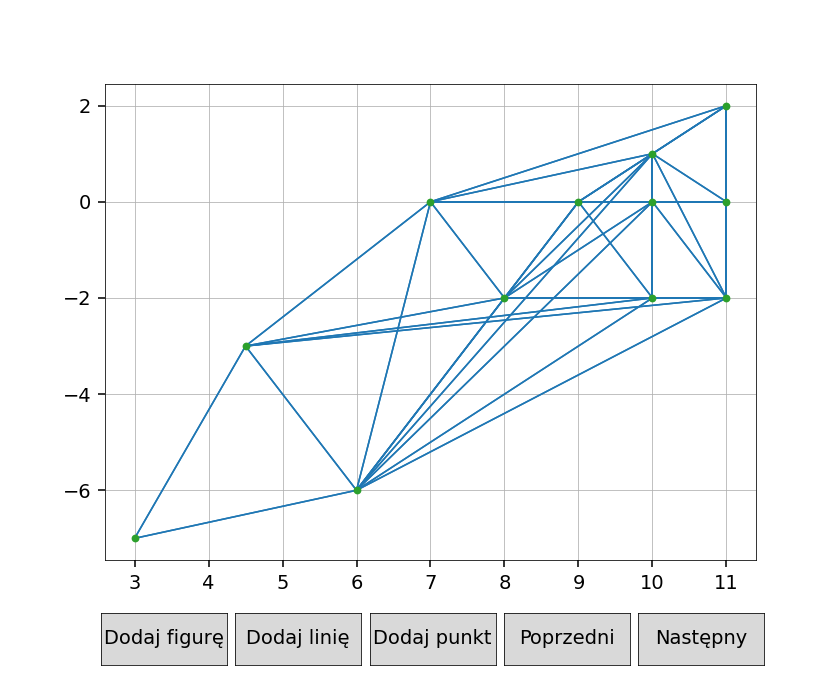

In [4]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

plot2 = Plot(visibility_graph_scenes(F))
plot2.draw()

<IPython.core.display.Javascript object>


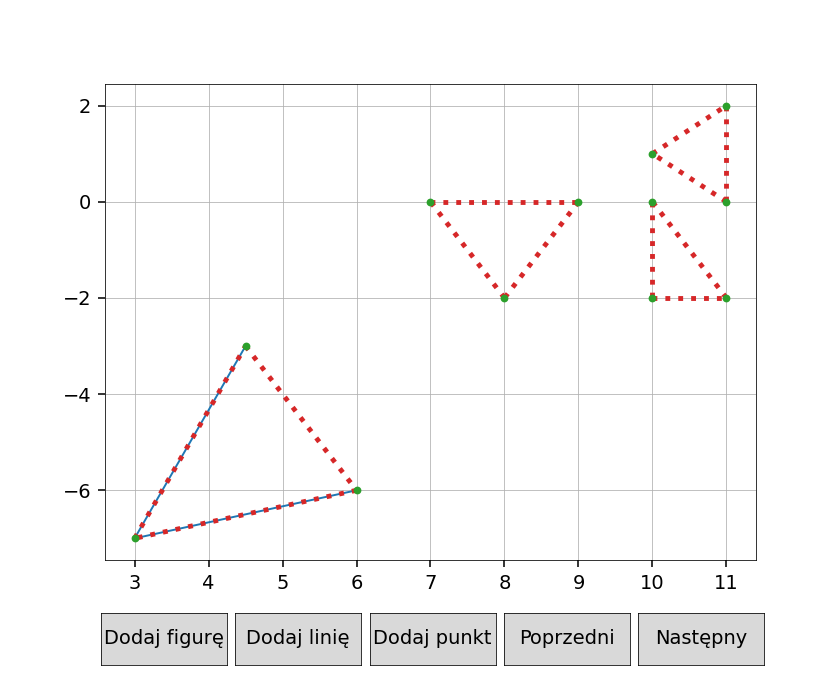

In [5]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

plot3 = Plot(visibility_graph_scenes_separately(F))
plot3.draw()

KeyboardInterrupt: 

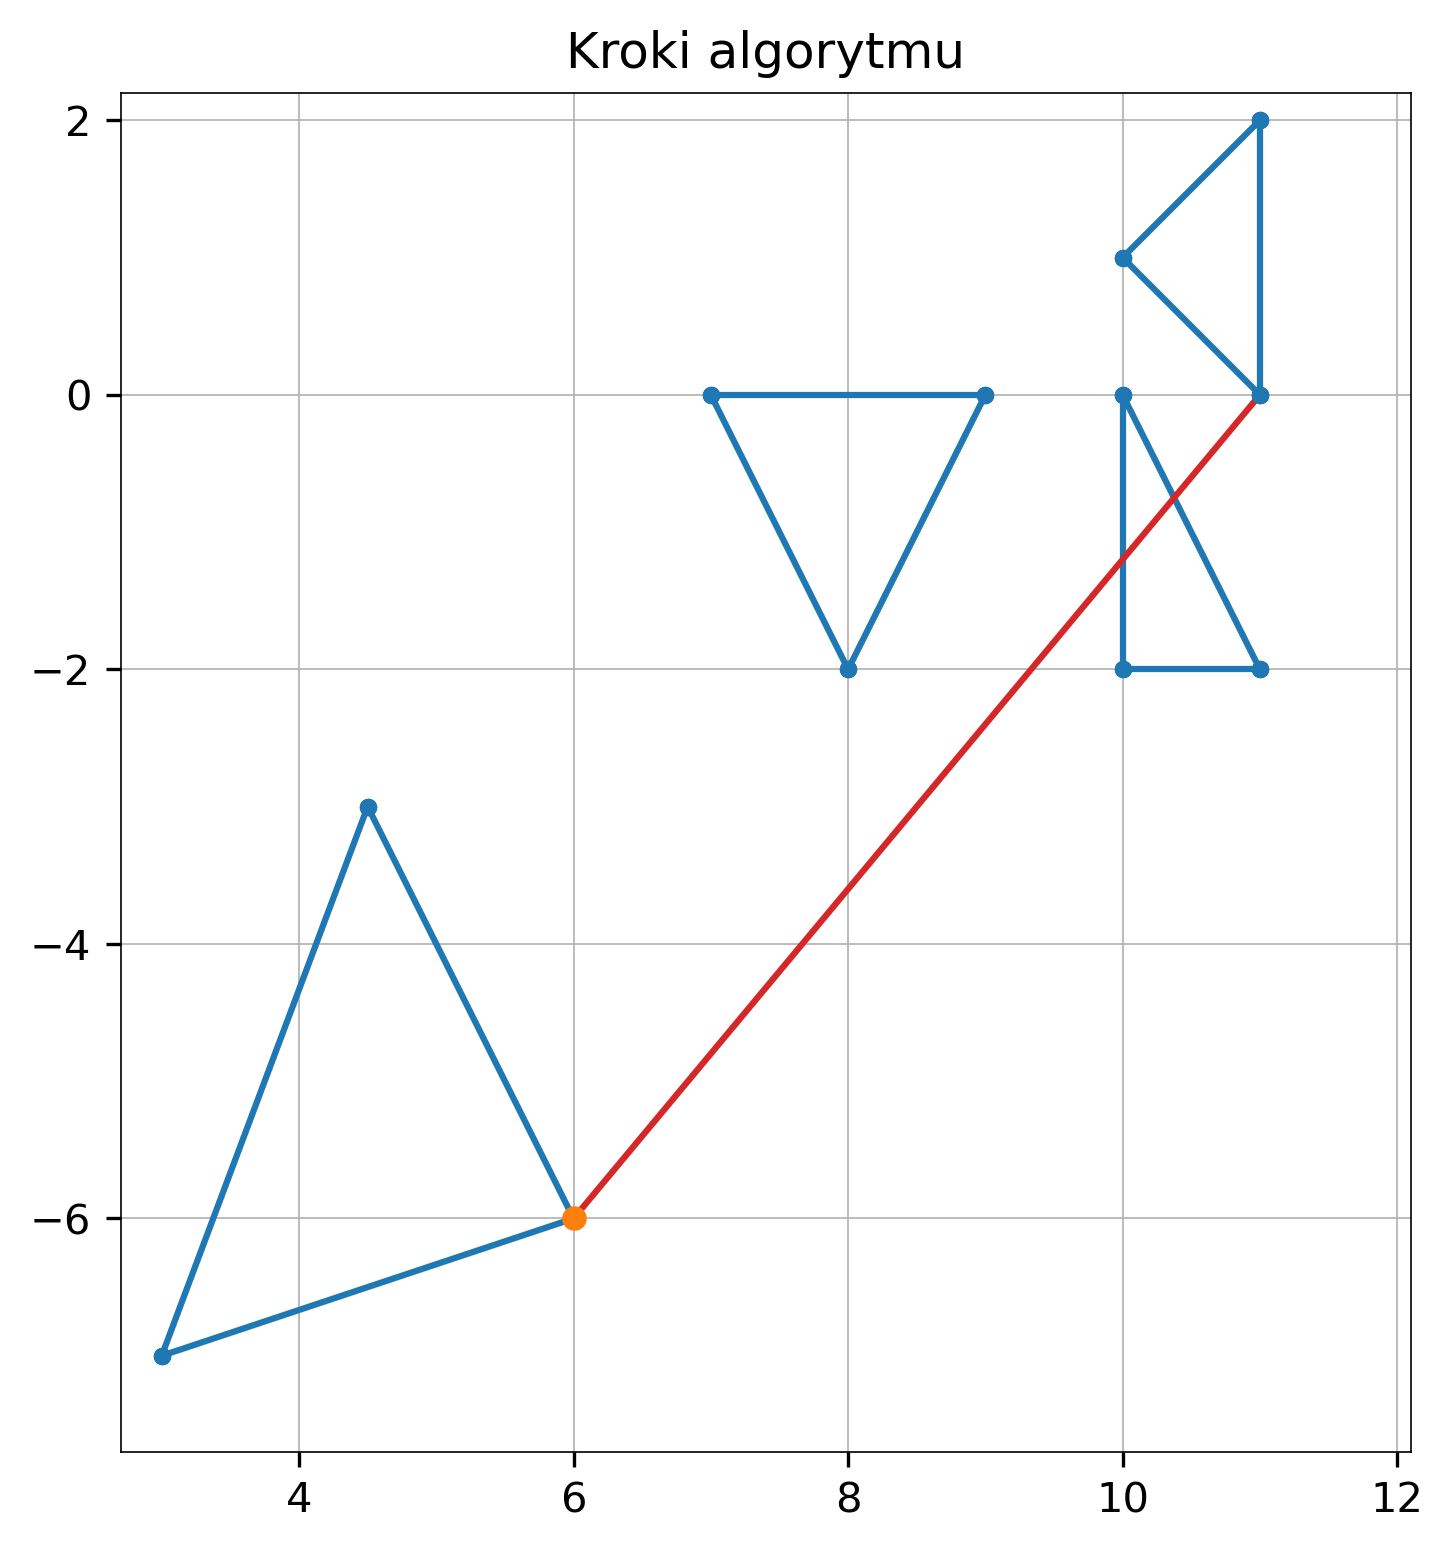

In [60]:
%matplotlib inline

# zapisywanie kroków do plików
plotter1 = Plotter(draw_partial=True)
create_visibility_graph(F, plotter1)
print("Zakończono zapisywanie")

<IPython.core.display.Javascript object>


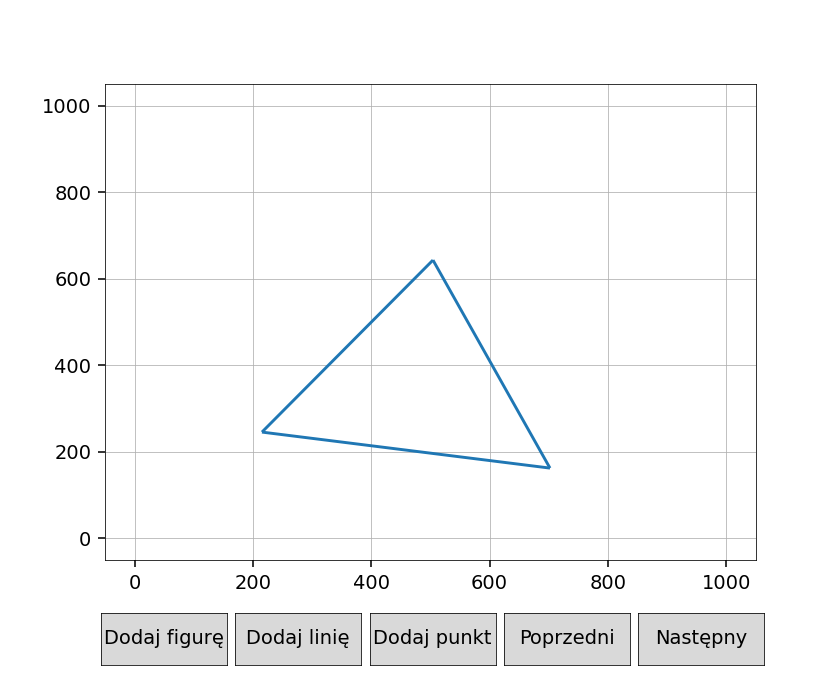

In [6]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

scenes3 = [
    Scene(
        [PointsCollection([])],
        [LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])]
    )
]
plot3 = Plot(scenes3)
plot3.draw()

<IPython.core.display.Javascript object>


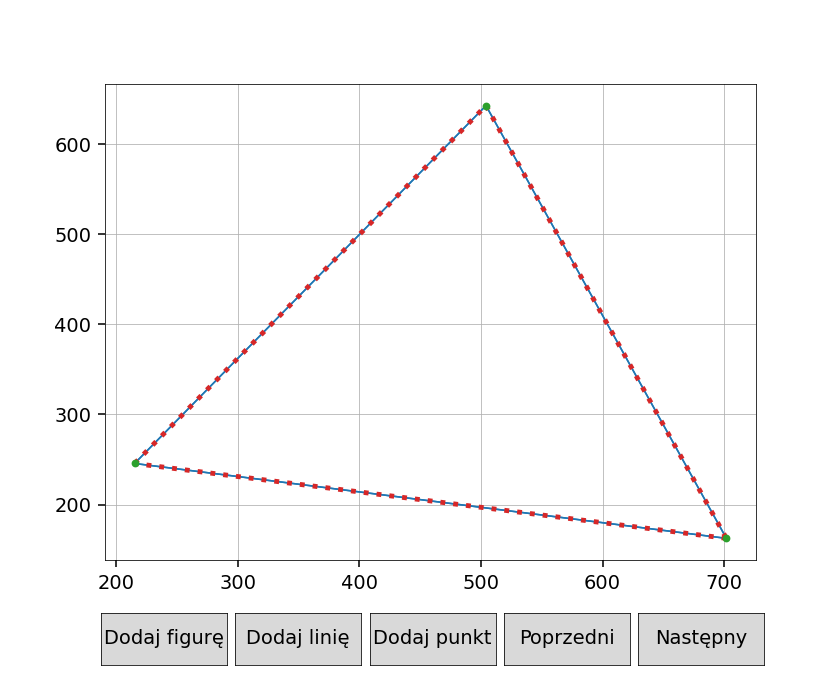

In [11]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

plot4 = Plot(visibility_graph_scenes(get_figures_from_plot(plot3)))
plot4.draw()

<IPython.core.display.Javascript object>


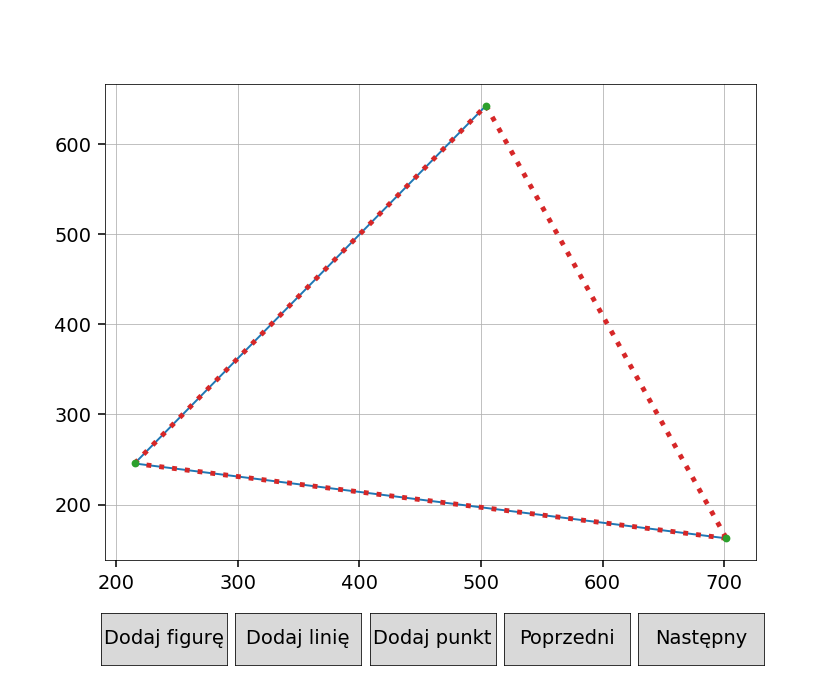

In [12]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

plot5 = Plot(visibility_graph_scenes_separately(get_figures_from_plot(plot3)))
plot5.draw()


In [9]:
%matplotlib inline

# zapisywanie kroków do plików
plotter2 = Plotter(draw_partial=True)
create_visibility_graph(get_figures_from_plot(plot3), plotter2)
print("Zakończono zapisywanie")

Zakończono zapisywanie


### Shortest path

<IPython.core.display.Javascript object>


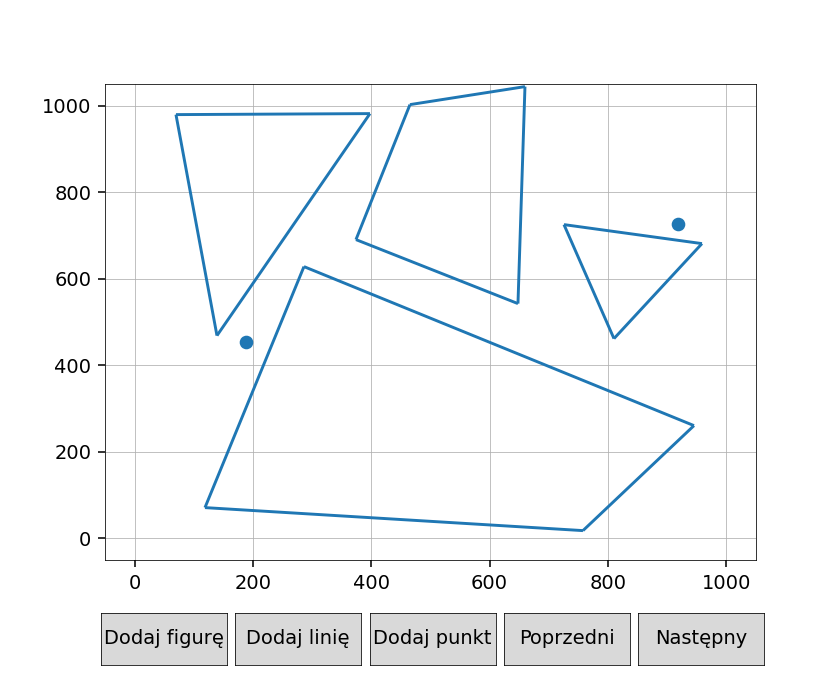

In [12]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

scenes6 = [
    Scene(
        [PointsCollection([])],
        [LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])]
    )
]
plot6 = Plot(scenes3)
plot6.draw()

<IPython.core.display.Javascript object>


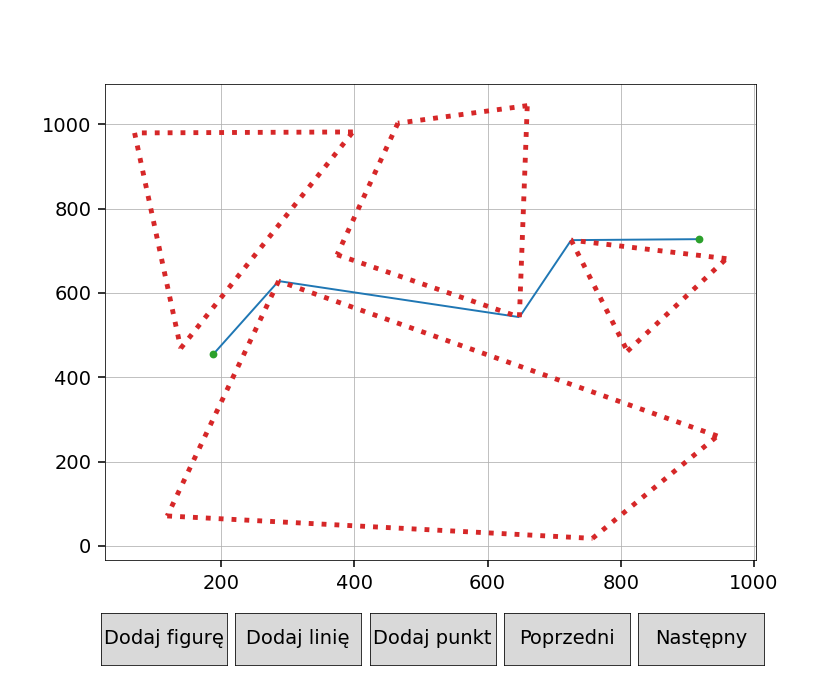

In [13]:
%matplotlib notebook
mpl.rcParams['figure.dpi'] = 140
mpl.rcParams['figure.figsize'] = (6.0, 5.0)

points = get_points_from_plot(plot6)
if len(points) >= 2:
    plot7 = Plot(shortest_path_scene(get_figures_from_plot(plot6), points[0], points[1]))
    plot7.draw()
